## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  27.893901   721.969979  0.455764  4.015758  1.549483
1  66.305736  1598.531372  0.523825  3.805656  1.440110
2  10.714520  1379.522164  0.269160  6.824316  1.725627
3  99.092172   648.404054  0.247090  5.276942  0.921012
4  63.276800  1434.696374  0.088696  4.591338  1.075432


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.08175 | train_mse: 3.77261 | train_mae: 1.48313 |  0:00:00s
epoch 1  | loss: 0.43487 | train_mse: 4.4236  | train_mae: 1.59144 |  0:00:00s
epoch 2  | loss: 0.42271 | train_mse: 4.4134  | train_mae: 1.53365 |  0:00:00s
epoch 3  | loss: 0.66326 | train_mse: 1.69731 | train_mae: 0.98997 |  0:00:00s


epoch 4  | loss: 0.44714 | train_mse: 1.10248 | train_mae: 0.81292 |  0:00:00s
epoch 5  | loss: 0.31872 | train_mse: 1.42039 | train_mae: 0.84695 |  0:00:00s
epoch 6  | loss: 0.34016 | train_mse: 2.03356 | train_mae: 0.99636 |  0:00:00s


epoch 7  | loss: 0.23753 | train_mse: 1.64699 | train_mae: 0.8995  |  0:00:00s
epoch 8  | loss: 0.2849  | train_mse: 0.79478 | train_mae: 0.61935 |  0:00:00s
epoch 9  | loss: 0.27234 | train_mse: 0.87896 | train_mae: 0.6542  |  0:00:00s


epoch 10 | loss: 0.29268 | train_mse: 1.17308 | train_mae: 0.80737 |  0:00:00s
epoch 11 | loss: 0.23974 | train_mse: 1.41395 | train_mae: 0.84082 |  0:00:00s
epoch 12 | loss: 0.21556 | train_mse: 0.96476 | train_mae: 0.66547 |  0:00:01s


epoch 13 | loss: 0.18013 | train_mse: 0.59418 | train_mae: 0.53215 |  0:00:01s
epoch 14 | loss: 0.33849 | train_mse: 0.4434  | train_mae: 0.47911 |  0:00:01s
epoch 15 | loss: 0.3478  | train_mse: 0.43472 | train_mae: 0.48879 |  0:00:01s


epoch 16 | loss: 0.30302 | train_mse: 0.48599 | train_mae: 0.51782 |  0:00:01s
epoch 17 | loss: 0.17368 | train_mse: 0.46834 | train_mae: 0.50453 |  0:00:01s
epoch 18 | loss: 0.25376 | train_mse: 0.47446 | train_mae: 0.5013  |  0:00:01s


epoch 19 | loss: 0.1674  | train_mse: 0.47073 | train_mae: 0.49198 |  0:00:01s
epoch 20 | loss: 0.20612 | train_mse: 0.52674 | train_mae: 0.51796 |  0:00:01s
epoch 21 | loss: 0.26996 | train_mse: 0.51594 | train_mae: 0.52283 |  0:00:01s


epoch 22 | loss: 0.18206 | train_mse: 0.43903 | train_mae: 0.4989  |  0:00:01s
epoch 23 | loss: 0.13282 | train_mse: 0.24659 | train_mae: 0.39749 |  0:00:02s
epoch 24 | loss: 0.2401  | train_mse: 0.16125 | train_mae: 0.3179  |  0:00:02s


epoch 25 | loss: 0.21362 | train_mse: 0.16459 | train_mae: 0.31413 |  0:00:02s
epoch 26 | loss: 0.29741 | train_mse: 0.17248 | train_mae: 0.31913 |  0:00:02s
epoch 27 | loss: 0.14424 | train_mse: 0.18826 | train_mae: 0.34194 |  0:00:02s


epoch 28 | loss: 0.19422 | train_mse: 0.25296 | train_mae: 0.37842 |  0:00:02s
epoch 29 | loss: 0.17837 | train_mse: 0.38783 | train_mae: 0.45485 |  0:00:03s


epoch 30 | loss: 0.18921 | train_mse: 0.40379 | train_mae: 0.47459 |  0:00:03s
epoch 31 | loss: 0.20515 | train_mse: 0.24381 | train_mae: 0.36402 |  0:00:03s
epoch 32 | loss: 0.14298 | train_mse: 0.23258 | train_mae: 0.34629 |  0:00:03s


epoch 33 | loss: 0.28584 | train_mse: 0.22737 | train_mae: 0.35812 |  0:00:03s
epoch 34 | loss: 0.22724 | train_mse: 0.25188 | train_mae: 0.38848 |  0:00:03s
epoch 35 | loss: 0.18041 | train_mse: 0.19193 | train_mae: 0.34623 |  0:00:03s


epoch 36 | loss: 0.1864  | train_mse: 0.14065 | train_mae: 0.29958 |  0:00:03s
epoch 37 | loss: 0.1607  | train_mse: 0.11333 | train_mae: 0.26551 |  0:00:03s
epoch 38 | loss: 0.33574 | train_mse: 0.1098  | train_mae: 0.25782 |  0:00:03s


epoch 39 | loss: 0.19171 | train_mse: 0.11075 | train_mae: 0.26652 |  0:00:04s
epoch 40 | loss: 0.12026 | train_mse: 0.22129 | train_mae: 0.37213 |  0:00:04s
epoch 41 | loss: 0.12913 | train_mse: 0.35178 | train_mae: 0.44923 |  0:00:04s


epoch 42 | loss: 0.23928 | train_mse: 0.30617 | train_mae: 0.41856 |  0:00:04s
epoch 43 | loss: 0.1499  | train_mse: 0.30252 | train_mae: 0.40675 |  0:00:04s
epoch 44 | loss: 0.15518 | train_mse: 0.38753 | train_mae: 0.45092 |  0:00:04s


epoch 45 | loss: 0.17785 | train_mse: 0.37735 | train_mae: 0.44984 |  0:00:04s
epoch 46 | loss: 0.17437 | train_mse: 0.46478 | train_mae: 0.49618 |  0:00:04s


epoch 47 | loss: 0.14053 | train_mse: 0.41024 | train_mae: 0.44924 |  0:00:04s
epoch 48 | loss: 0.1409  | train_mse: 0.44691 | train_mae: 0.46037 |  0:00:04s


epoch 49 | loss: 0.17984 | train_mse: 0.36865 | train_mae: 0.42807 |  0:00:05s
epoch 50 | loss: 0.50958 | train_mse: 0.33674 | train_mae: 0.4157  |  0:00:05s


epoch 51 | loss: 0.16816 | train_mse: 0.26349 | train_mae: 0.38411 |  0:00:05s
epoch 52 | loss: 0.17524 | train_mse: 0.2444  | train_mae: 0.38006 |  0:00:05s
epoch 53 | loss: 0.13301 | train_mse: 0.17052 | train_mae: 0.31563 |  0:00:05s


epoch 54 | loss: 0.11899 | train_mse: 0.15439 | train_mae: 0.30224 |  0:00:05s
epoch 55 | loss: 0.21859 | train_mse: 0.16545 | train_mae: 0.30905 |  0:00:05s


epoch 56 | loss: 0.16136 | train_mse: 0.14802 | train_mae: 0.29387 |  0:00:05s
epoch 57 | loss: 0.08312 | train_mse: 0.12506 | train_mae: 0.28267 |  0:00:05s
epoch 58 | loss: 0.20316 | train_mse: 0.12294 | train_mae: 0.27981 |  0:00:05s


epoch 59 | loss: 0.10487 | train_mse: 0.11284 | train_mae: 0.26286 |  0:00:06s
epoch 60 | loss: 0.14292 | train_mse: 0.13635 | train_mae: 0.26059 |  0:00:06s
epoch 61 | loss: 0.1787  | train_mse: 0.09953 | train_mae: 0.23895 |  0:00:06s


epoch 62 | loss: 0.24652 | train_mse: 0.09748 | train_mae: 0.24402 |  0:00:06s
epoch 63 | loss: 0.14528 | train_mse: 0.09669 | train_mae: 0.24629 |  0:00:06s
epoch 64 | loss: 0.27245 | train_mse: 0.09493 | train_mae: 0.24087 |  0:00:06s


epoch 65 | loss: 0.1269  | train_mse: 0.09163 | train_mae: 0.2324  |  0:00:06s
epoch 66 | loss: 0.1266  | train_mse: 0.0814  | train_mae: 0.22066 |  0:00:06s
epoch 67 | loss: 0.12638 | train_mse: 0.08256 | train_mae: 0.22471 |  0:00:06s


epoch 68 | loss: 0.26546 | train_mse: 0.09226 | train_mae: 0.23461 |  0:00:06s
epoch 69 | loss: 0.09563 | train_mse: 0.09495 | train_mae: 0.2311  |  0:00:06s
epoch 70 | loss: 0.17632 | train_mse: 0.09477 | train_mae: 0.22416 |  0:00:06s


epoch 71 | loss: 0.13152 | train_mse: 0.10591 | train_mae: 0.22993 |  0:00:06s
epoch 72 | loss: 0.14718 | train_mse: 0.07085 | train_mae: 0.20119 |  0:00:06s
epoch 73 | loss: 0.12383 | train_mse: 0.08007 | train_mae: 0.21965 |  0:00:07s


epoch 74 | loss: 0.10778 | train_mse: 0.10998 | train_mae: 0.25319 |  0:00:07s
epoch 75 | loss: 0.31844 | train_mse: 0.11493 | train_mae: 0.26096 |  0:00:07s
epoch 76 | loss: 0.13828 | train_mse: 0.07123 | train_mae: 0.20615 |  0:00:07s


epoch 77 | loss: 0.10895 | train_mse: 0.06853 | train_mae: 0.20243 |  0:00:07s
epoch 78 | loss: 0.1425  | train_mse: 0.07139 | train_mae: 0.1965  |  0:00:07s
epoch 79 | loss: 0.11553 | train_mse: 0.089   | train_mae: 0.22623 |  0:00:07s


epoch 80 | loss: 0.09891 | train_mse: 0.11106 | train_mae: 0.25401 |  0:00:07s
epoch 81 | loss: 0.21323 | train_mse: 0.09068 | train_mae: 0.22628 |  0:00:07s
epoch 82 | loss: 0.20661 | train_mse: 0.08681 | train_mae: 0.22559 |  0:00:07s


epoch 83 | loss: 0.12309 | train_mse: 0.06935 | train_mae: 0.20727 |  0:00:07s
epoch 84 | loss: 0.10714 | train_mse: 0.0684  | train_mae: 0.21166 |  0:00:07s
epoch 85 | loss: 0.26047 | train_mse: 0.07525 | train_mae: 0.22178 |  0:00:08s


epoch 86 | loss: 0.29602 | train_mse: 0.10933 | train_mae: 0.26026 |  0:00:08s
epoch 87 | loss: 0.16912 | train_mse: 0.10113 | train_mae: 0.24837 |  0:00:08s
epoch 88 | loss: 0.10148 | train_mse: 0.08618 | train_mae: 0.22274 |  0:00:08s
epoch 89 | loss: 0.14814 | train_mse: 0.07842 | train_mae: 0.21008 |  0:00:08s


epoch 90 | loss: 0.16682 | train_mse: 0.0725  | train_mae: 0.20401 |  0:00:08s
epoch 91 | loss: 0.11352 | train_mse: 0.06353 | train_mae: 0.19608 |  0:00:08s
epoch 92 | loss: 0.13947 | train_mse: 0.07877 | train_mae: 0.2198  |  0:00:08s
epoch 93 | loss: 0.13329 | train_mse: 0.09133 | train_mae: 0.24008 |  0:00:08s


epoch 94 | loss: 0.151   | train_mse: 0.08294 | train_mae: 0.22746 |  0:00:08s
epoch 95 | loss: 0.11387 | train_mse: 0.10421 | train_mae: 0.24956 |  0:00:08s
epoch 96 | loss: 0.1381  | train_mse: 0.10825 | train_mae: 0.25241 |  0:00:08s


epoch 97 | loss: 0.1448  | train_mse: 0.09016 | train_mae: 0.23947 |  0:00:08s
epoch 98 | loss: 0.19427 | train_mse: 0.07553 | train_mae: 0.22799 |  0:00:08s
epoch 99 | loss: 0.07334 | train_mse: 0.06426 | train_mae: 0.2056  |  0:00:09s


epoch 100| loss: 0.14006 | train_mse: 0.07063 | train_mae: 0.20106 |  0:00:09s
epoch 101| loss: 0.25869 | train_mse: 0.10942 | train_mae: 0.25131 |  0:00:09s
epoch 102| loss: 0.12506 | train_mse: 0.07086 | train_mae: 0.19918 |  0:00:09s
epoch 103| loss: 0.0646  | train_mse: 0.0482  | train_mae: 0.16587 |  0:00:09s


epoch 104| loss: 0.12367 | train_mse: 0.05043 | train_mae: 0.17696 |  0:00:09s
epoch 105| loss: 0.14686 | train_mse: 0.05264 | train_mae: 0.18022 |  0:00:09s
epoch 106| loss: 0.1155  | train_mse: 0.06014 | train_mae: 0.18871 |  0:00:09s
epoch 107| loss: 0.11082 | train_mse: 0.06988 | train_mae: 0.20738 |  0:00:09s


epoch 108| loss: 0.09982 | train_mse: 0.06545 | train_mae: 0.19934 |  0:00:09s
epoch 109| loss: 0.14325 | train_mse: 0.06128 | train_mae: 0.1993  |  0:00:09s
epoch 110| loss: 0.2084  | train_mse: 0.05853 | train_mae: 0.19215 |  0:00:09s


epoch 111| loss: 0.10505 | train_mse: 0.05573 | train_mae: 0.18328 |  0:00:09s
epoch 112| loss: 0.1791  | train_mse: 0.05009 | train_mae: 0.17765 |  0:00:09s
epoch 113| loss: 0.16571 | train_mse: 0.04726 | train_mae: 0.17226 |  0:00:09s
epoch 114| loss: 0.06467 | train_mse: 0.09014 | train_mae: 0.23612 |  0:00:10s


epoch 115| loss: 0.15668 | train_mse: 0.14166 | train_mae: 0.28509 |  0:00:10s
epoch 116| loss: 0.07746 | train_mse: 0.14322 | train_mae: 0.28853 |  0:00:10s
epoch 117| loss: 0.08289 | train_mse: 0.08861 | train_mae: 0.23842 |  0:00:10s
epoch 118| loss: 0.08091 | train_mse: 0.06573 | train_mae: 0.21191 |  0:00:10s


epoch 119| loss: 0.12307 | train_mse: 0.05306 | train_mae: 0.19042 |  0:00:10s
epoch 120| loss: 0.16905 | train_mse: 0.04691 | train_mae: 0.17366 |  0:00:10s
epoch 121| loss: 0.09911 | train_mse: 0.05142 | train_mae: 0.18513 |  0:00:10s
epoch 122| loss: 0.20103 | train_mse: 0.06302 | train_mae: 0.2019  |  0:00:10s


epoch 123| loss: 0.06217 | train_mse: 0.05657 | train_mae: 0.19066 |  0:00:10s
epoch 124| loss: 0.21959 | train_mse: 0.06486 | train_mae: 0.20705 |  0:00:10s
epoch 125| loss: 0.09712 | train_mse: 0.04996 | train_mae: 0.18279 |  0:00:10s


epoch 126| loss: 0.24138 | train_mse: 0.04204 | train_mae: 0.16548 |  0:00:10s
epoch 127| loss: 0.08271 | train_mse: 0.04443 | train_mae: 0.17005 |  0:00:10s
epoch 128| loss: 0.09449 | train_mse: 0.03841 | train_mae: 0.15914 |  0:00:11s


epoch 129| loss: 0.08306 | train_mse: 0.04087 | train_mae: 0.16438 |  0:00:11s
epoch 130| loss: 0.07987 | train_mse: 0.03836 | train_mae: 0.15776 |  0:00:11s
epoch 131| loss: 0.0814  | train_mse: 0.03838 | train_mae: 0.16033 |  0:00:11s
epoch 132| loss: 0.07437 | train_mse: 0.04114 | train_mae: 0.16434 |  0:00:11s


epoch 133| loss: 0.09484 | train_mse: 0.04124 | train_mae: 0.15765 |  0:00:11s
epoch 134| loss: 0.1254  | train_mse: 0.04871 | train_mae: 0.16664 |  0:00:11s
epoch 135| loss: 0.16802 | train_mse: 0.06423 | train_mae: 0.1845  |  0:00:11s


epoch 136| loss: 0.09876 | train_mse: 0.07228 | train_mae: 0.19397 |  0:00:11s
epoch 137| loss: 0.1143  | train_mse: 0.06111 | train_mae: 0.18052 |  0:00:11s
epoch 138| loss: 0.08951 | train_mse: 0.0493  | train_mae: 0.17456 |  0:00:11s


epoch 139| loss: 0.15555 | train_mse: 0.0462  | train_mae: 0.17015 |  0:00:11s
epoch 140| loss: 0.18258 | train_mse: 0.04605 | train_mae: 0.16507 |  0:00:11s
epoch 141| loss: 0.10225 | train_mse: 0.04056 | train_mae: 0.15646 |  0:00:11s


epoch 142| loss: 0.09968 | train_mse: 0.04099 | train_mae: 0.15567 |  0:00:12s
epoch 143| loss: 0.12478 | train_mse: 0.0413  | train_mae: 0.15958 |  0:00:12s
epoch 144| loss: 0.07141 | train_mse: 0.0491  | train_mae: 0.17974 |  0:00:12s


epoch 145| loss: 0.09575 | train_mse: 0.05018 | train_mae: 0.18159 |  0:00:12s
epoch 146| loss: 0.08426 | train_mse: 0.04935 | train_mae: 0.17616 |  0:00:12s
epoch 147| loss: 0.08451 | train_mse: 0.04785 | train_mae: 0.17187 |  0:00:12s
epoch 148| loss: 0.12373 | train_mse: 0.05281 | train_mae: 0.17829 |  0:00:12s


epoch 149| loss: 0.09268 | train_mse: 0.04859 | train_mae: 0.17246 |  0:00:12s
epoch 150| loss: 0.14962 | train_mse: 0.04857 | train_mae: 0.17199 |  0:00:12s
epoch 151| loss: 0.08082 | train_mse: 0.05287 | train_mae: 0.17817 |  0:00:12s


epoch 152| loss: 0.0898  | train_mse: 0.05541 | train_mae: 0.18167 |  0:00:12s
epoch 153| loss: 0.06767 | train_mse: 0.05466 | train_mae: 0.17526 |  0:00:12s
epoch 154| loss: 0.20555 | train_mse: 0.05739 | train_mae: 0.18376 |  0:00:12s


epoch 155| loss: 0.25523 | train_mse: 0.04738 | train_mae: 0.16676 |  0:00:12s
epoch 156| loss: 0.08726 | train_mse: 0.04292 | train_mae: 0.16063 |  0:00:13s
epoch 157| loss: 0.11263 | train_mse: 0.04587 | train_mae: 0.17104 |  0:00:13s


epoch 158| loss: 0.09116 | train_mse: 0.04787 | train_mae: 0.17534 |  0:00:13s
epoch 159| loss: 0.06653 | train_mse: 0.04575 | train_mae: 0.17136 |  0:00:13s
epoch 160| loss: 0.11614 | train_mse: 0.04932 | train_mae: 0.17197 |  0:00:13s


epoch 161| loss: 0.07401 | train_mse: 0.03939 | train_mae: 0.1539  |  0:00:13s
epoch 162| loss: 0.08288 | train_mse: 0.03534 | train_mae: 0.1471  |  0:00:13s
epoch 163| loss: 0.12879 | train_mse: 0.04537 | train_mae: 0.16896 |  0:00:13s


epoch 164| loss: 0.1299  | train_mse: 0.06137 | train_mae: 0.19205 |  0:00:13s
epoch 165| loss: 0.11402 | train_mse: 0.0538  | train_mae: 0.18237 |  0:00:13s
epoch 166| loss: 0.22703 | train_mse: 0.05849 | train_mae: 0.18835 |  0:00:14s


epoch 167| loss: 0.21384 | train_mse: 0.0613  | train_mae: 0.19126 |  0:00:14s
epoch 168| loss: 0.06324 | train_mse: 0.06135 | train_mae: 0.18837 |  0:00:14s


epoch 169| loss: 0.09943 | train_mse: 0.05261 | train_mae: 0.17548 |  0:00:14s
epoch 170| loss: 0.14856 | train_mse: 0.04822 | train_mae: 0.1793  |  0:00:14s
epoch 171| loss: 0.11136 | train_mse: 0.05461 | train_mae: 0.19088 |  0:00:14s


epoch 172| loss: 0.11353 | train_mse: 0.076   | train_mae: 0.21343 |  0:00:14s
epoch 173| loss: 0.07059 | train_mse: 0.12523 | train_mae: 0.24599 |  0:00:14s


epoch 174| loss: 0.10058 | train_mse: 0.13508 | train_mae: 0.24934 |  0:00:14s
epoch 175| loss: 0.09197 | train_mse: 0.08878 | train_mae: 0.22406 |  0:00:14s
epoch 176| loss: 0.10276 | train_mse: 0.09811 | train_mae: 0.23646 |  0:00:15s


epoch 177| loss: 0.06835 | train_mse: 0.08688 | train_mae: 0.22907 |  0:00:15s
epoch 178| loss: 0.17175 | train_mse: 0.06548 | train_mae: 0.19244 |  0:00:15s


epoch 179| loss: 0.0949  | train_mse: 0.08172 | train_mae: 0.21651 |  0:00:15s
epoch 180| loss: 0.09959 | train_mse: 0.09481 | train_mae: 0.23395 |  0:00:15s
epoch 181| loss: 0.10571 | train_mse: 0.10299 | train_mae: 0.24064 |  0:00:15s


epoch 182| loss: 0.12716 | train_mse: 0.08026 | train_mae: 0.22694 |  0:00:15s
epoch 183| loss: 0.11572 | train_mse: 0.07619 | train_mae: 0.21019 |  0:00:15s


epoch 184| loss: 0.1095  | train_mse: 0.08043 | train_mae: 0.21061 |  0:00:15s
epoch 185| loss: 0.13253 | train_mse: 0.10104 | train_mae: 0.2359  |  0:00:15s
epoch 186| loss: 0.10529 | train_mse: 0.07795 | train_mae: 0.21112 |  0:00:16s


epoch 187| loss: 0.15569 | train_mse: 0.08516 | train_mae: 0.22005 |  0:00:16s
epoch 188| loss: 0.06515 | train_mse: 0.10118 | train_mae: 0.23778 |  0:00:16s
epoch 189| loss: 0.10274 | train_mse: 0.09759 | train_mae: 0.23435 |  0:00:16s


epoch 190| loss: 0.17425 | train_mse: 0.07854 | train_mae: 0.21965 |  0:00:16s
epoch 191| loss: 0.05409 | train_mse: 0.08735 | train_mae: 0.23115 |  0:00:16s
epoch 192| loss: 0.0763  | train_mse: 0.08009 | train_mae: 0.21941 |  0:00:16s


epoch 193| loss: 0.16173 | train_mse: 0.0744  | train_mae: 0.2087  |  0:00:16s
epoch 194| loss: 0.13848 | train_mse: 0.05789 | train_mae: 0.19273 |  0:00:16s
epoch 195| loss: 0.10974 | train_mse: 0.06079 | train_mae: 0.19439 |  0:00:16s


epoch 196| loss: 0.08354 | train_mse: 0.06197 | train_mae: 0.19145 |  0:00:16s
epoch 197| loss: 0.12372 | train_mse: 0.06082 | train_mae: 0.19028 |  0:00:16s
epoch 198| loss: 0.09731 | train_mse: 0.05423 | train_mae: 0.17431 |  0:00:17s


epoch 199| loss: 0.18377 | train_mse: 0.05433 | train_mae: 0.17583 |  0:00:17s
epoch 200| loss: 0.07123 | train_mse: 0.04548 | train_mae: 0.16643 |  0:00:17s


epoch 201| loss: 0.10459 | train_mse: 0.04531 | train_mae: 0.16655 |  0:00:17s
epoch 202| loss: 0.10607 | train_mse: 0.05172 | train_mae: 0.16962 |  0:00:17s
epoch 203| loss: 0.06047 | train_mse: 0.06099 | train_mae: 0.17798 |  0:00:17s
epoch 204| loss: 0.09115 | train_mse: 0.05253 | train_mae: 0.17289 |  0:00:17s


epoch 205| loss: 0.06497 | train_mse: 0.04529 | train_mae: 0.16802 |  0:00:17s
epoch 206| loss: 0.13739 | train_mse: 0.04215 | train_mae: 0.16377 |  0:00:17s


epoch 207| loss: 0.26028 | train_mse: 0.05005 | train_mae: 0.18179 |  0:00:17s
epoch 208| loss: 0.15657 | train_mse: 0.04555 | train_mae: 0.17185 |  0:00:17s
epoch 209| loss: 0.14523 | train_mse: 0.06635 | train_mae: 0.18584 |  0:00:18s


epoch 210| loss: 0.13788 | train_mse: 0.08075 | train_mae: 0.20651 |  0:00:18s
epoch 211| loss: 0.09748 | train_mse: 0.07571 | train_mae: 0.20648 |  0:00:18s
epoch 212| loss: 0.07983 | train_mse: 0.09018 | train_mae: 0.22341 |  0:00:18s

Early stopping occurred at epoch 212 with best_epoch = 162 and best_train_mae = 0.1471
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

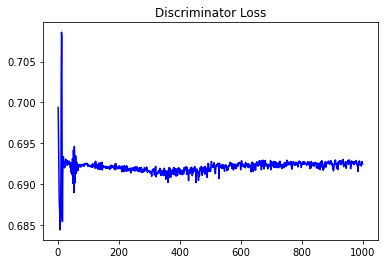

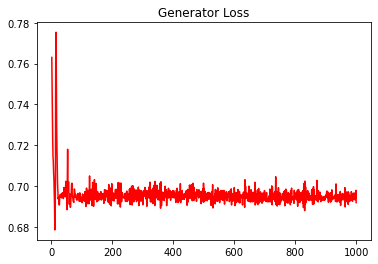

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.17687780298039632


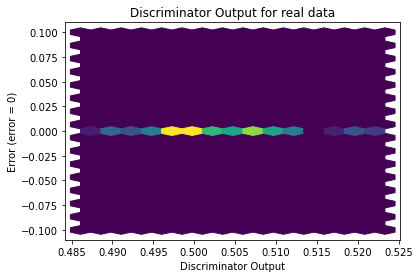

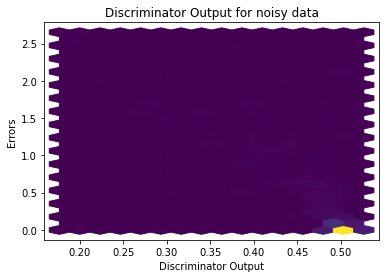

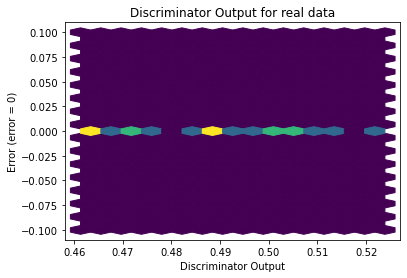

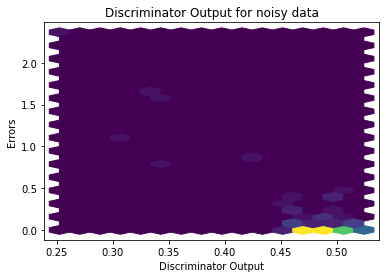

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


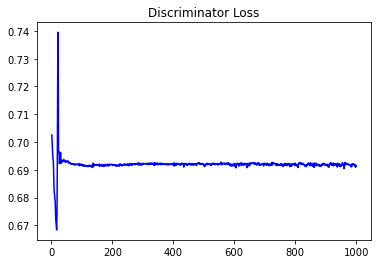

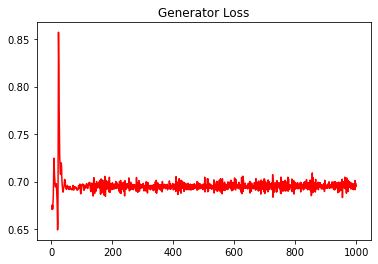

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.161561533281519


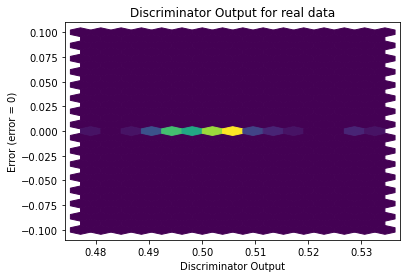

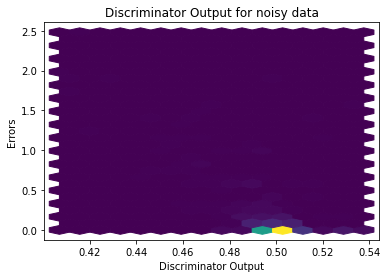

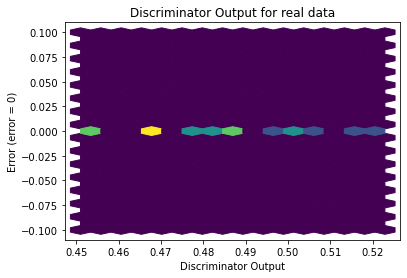

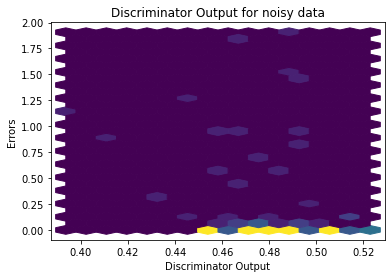

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.7465]], requires_grad=True)
